In [3]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 54.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=318a2d723220b324907b35d3121fdc17f92fbab1e5153750052c96a368f362d7
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [11]:
import numpy as np
import pandas as pd
from statsmodels.datasets import get_rdataset
from ISLP import load_data , confusion_table

In [12]:
df = pd.read_csv("/content/dataQTM.csv")
#M = 0, B = 1
Benign = np.where(df['diagnosis'] > 0, "Benign", "Malignant")

In [13]:
from sklearn.tree import DecisionTreeClassifier as DTC
from ISLP.models import ModelSpec as MS

In [14]:
model = MS(df.columns.drop('diagnosis'), intercept=False)
D = model.fit_transform(df)
feature_names = list(D.columns)
X = np.asarray(D)

In [15]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)

clf.fit(X, Benign)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
from sklearn.metrics import accuracy_score

In [18]:
# This is prediction accuracy
accuracy_score(Benign, clf.predict(X))

0.968365553602812

In [19]:
from sklearn.metrics import log_loss

In [20]:
# deviance, the smaller, the better
resid_dev = np.sum(log_loss(Benign, clf.predict_proba(X)))
resid_dev

0.08517045624888883

In [21]:
from matplotlib.pyplot import subplots
from sklearn.tree import plot_tree

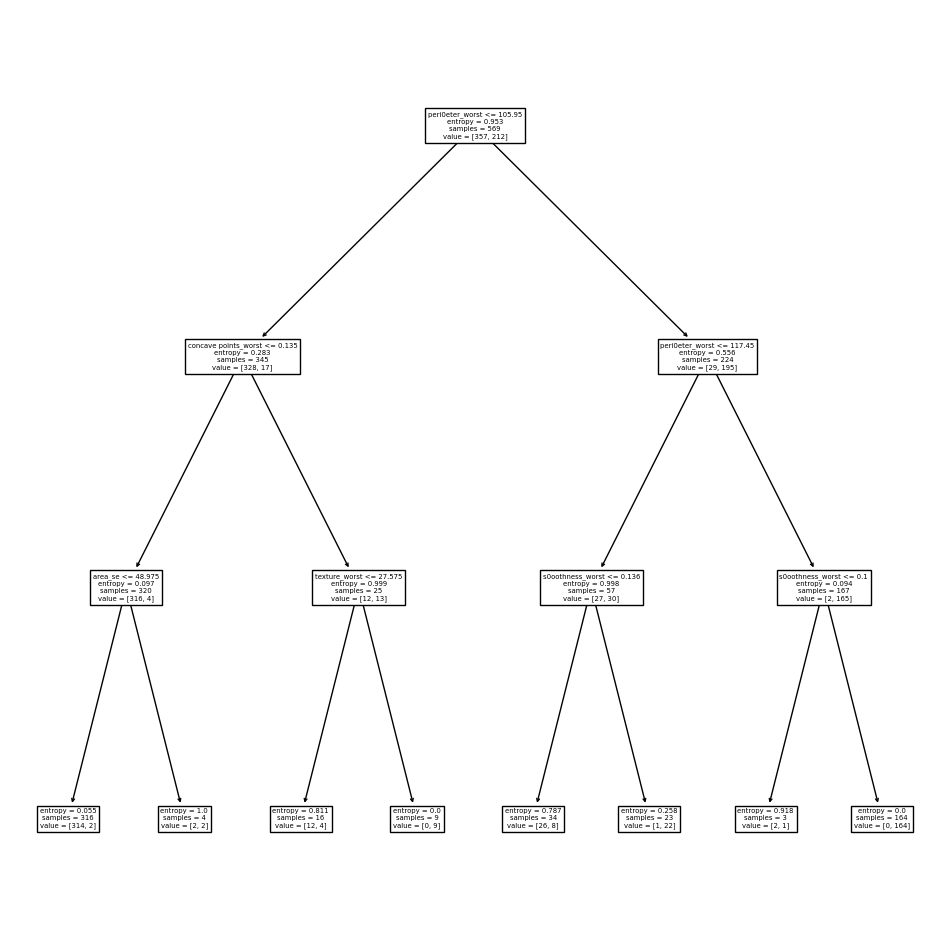

In [22]:
#most important feature in predicting diagnosis: perimeter_worst
ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

In [23]:
from sklearn.tree import export_text

In [24]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- peri0eter_worst <= 105.95
|   |--- concave points_worst <= 0.14
|   |   |--- area_se <= 48.98
|   |   |   |--- weights: [314.00, 2.00] class: Benign
|   |   |--- area_se >  48.98
|   |   |   |--- weights: [2.00, 2.00] class: Benign
|   |--- concave points_worst >  0.14
|   |   |--- texture_worst <= 27.58
|   |   |   |--- weights: [12.00, 4.00] class: Benign
|   |   |--- texture_worst >  27.58
|   |   |   |--- weights: [0.00, 9.00] class: Malignant
|--- peri0eter_worst >  105.95
|   |--- peri0eter_worst <= 117.45
|   |   |--- s0oothness_worst <= 0.14
|   |   |   |--- weights: [26.00, 8.00] class: Benign
|   |   |--- s0oothness_worst >  0.14
|   |   |   |--- weights: [1.00, 22.00] class: Malignant
|   |--- peri0eter_worst >  117.45
|   |   |--- s0oothness_worst <= 0.10
|   |   |   |--- weights: [2.00, 1.00] class: Benign
|   |   |--- s0oothness_worst >  0.10
|   |   |   |--- weights: [0.00, 164.00] class: Malignant



In [25]:
import sklearn.model_selection as skm

In [27]:
#correct prediction percentage 94%

validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             D,
                             Benign,
                             cv=validation)
results['test_score']

array([0.94])